In [1]:
!nvidia-smi

Sat May 29 19:50:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    On   | 00000000:01:00.0  On |                  N/A |
| N/A   55C    P8    11W /  N/A |   3785MiB /  8111MiB |     13%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
if not os.path.isdir('keras-retinanet'):
    !git clone https://github.com/fizyr/keras-retinanet.git

In [3]:
!pip install --upgrade keras

In [4]:
%cd keras-retinanet
!ls

/home/skycam/sample_projs/FRCNN/delivered/RetinaNet_Fabric_Defect/keras-retinanet
alldata.csv	 classes.csv	  LICENSE    requirements.txt  snapshots
annotations.csv  examples	  maskdb     setup.cfg	       tests
build		 keras_retinanet  README.md  setup.py	       xml2csv.py


In [5]:

!ls
if 1: #make this 1 and run only on very first time
    !pip install .
    !python setup.py build_ext --inplace
    !pip install gdown
    !pip install tensorflow
    !pip3 install pandas
    !pip3 install seaborn
    !pip3 install sklearn

alldata.csv	 classes.csv	  LICENSE    requirements.txt  snapshots
annotations.csv  examples	  maskdb     setup.cfg	       tests
build		 keras_retinanet  README.md  setup.py	       xml2csv.py
Processing /home/skycam/sample_projs/FRCNN/delivered/RetinaNet_Fabric_Defect/keras-retinanet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp36-cp36m-linux_x86_64.whl size=167017 sha256=ae2fe2d25acff1d7693024ca21c91f2c565bee8ab6b8115f3ff33b143dc4956a
  Stored in directory: /home/skycam/.cache/pip/wheels/e6/38/c7/43fe8f6fb8b5448cde810a2b0f9e763117f19b74e29656495e
Successfully built keras-r

In [6]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [7]:
os.makedirs("snapshots", exist_ok=True)

In [8]:
#https://curiousily.com/posts/object-detection-on-custom-dataset-with-tensorflow-2-and-keras-using-python/
#https://colab.research.google.com/drive/1ldnii3sGJaUHPV6TWImykbeE_O-8VIIN#scrollTo=5DgiQ4FR0go6

In [9]:
os.makedirs("maskdb", exist_ok=True)

In [34]:
!python3 xml2csv.py

maskdb/train/annotations/c2r3e1n14_051.xml
xml to csv maskdb/train/annotations/c2r3e1n14_051.xml
maskdb/train/annotations/c2r2e1n2_226.xml
xml to csv maskdb/train/annotations/c2r2e1n2_226.xml
maskdb/train/annotations/c1r1e1n10_202.xml
xml to csv maskdb/train/annotations/c1r1e1n10_202.xml
maskdb/train/annotations/c1r1e1n33_177.xml
xml to csv maskdb/train/annotations/c1r1e1n33_177.xml
maskdb/train/annotations/c1r1e2n46_407.xml
xml to csv maskdb/train/annotations/c1r1e2n46_407.xml
maskdb/train/annotations/c1r3e1n20_130.xml
xml to csv maskdb/train/annotations/c1r3e1n20_130.xml
maskdb/train/annotations/c1r3e2n30_268.xml
xml to csv maskdb/train/annotations/c1r3e2n30_268.xml
maskdb/train/annotations/c2r2e2n45_190.xml
xml to csv maskdb/train/annotations/c2r2e2n45_190.xml
maskdb/train/annotations/c2r3e1n43_181.xml
xml to csv maskdb/train/annotations/c2r3e1n43_181.xml
maskdb/train/annotations/c2r3e2n36_382.xml
xml to csv maskdb/train/annotations/c2r3e2n36_382.xml
maskdb/train/annotations/c2r2e2n

maskdb/train/annotations/c2r3e1n25_079.xml
xml to csv maskdb/train/annotations/c2r3e1n25_079.xml
maskdb/train/annotations/c1r3e2n38_284.xml
xml to csv maskdb/train/annotations/c1r3e2n38_284.xml
maskdb/train/annotations/c1r1e2n29_254.xml
xml to csv maskdb/train/annotations/c1r1e2n29_254.xml
maskdb/train/annotations/c2r2e2n45_329.xml
xml to csv maskdb/train/annotations/c2r2e2n45_329.xml
maskdb/train/annotations/c2r2e2n32_360.xml
xml to csv maskdb/train/annotations/c2r2e2n32_360.xml
maskdb/train/annotations/c1r1e1n28_044.xml
xml to csv maskdb/train/annotations/c1r1e1n28_044.xml
maskdb/train/annotations/c2r3e2n5_319.xml
xml to csv maskdb/train/annotations/c2r3e2n5_319.xml
maskdb/train/annotations/c1r3e1n16_142.xml
xml to csv maskdb/train/annotations/c1r3e1n16_142.xml
maskdb/train/annotations/c1r3e1n50_125.xml
xml to csv maskdb/train/annotations/c1r3e1n50_125.xml
maskdb/train/annotations/c2r3e1n28_038.xml
xml to csv maskdb/train/annotations/c2r3e1n28_038.xml
maskdb/train/annotations/c2r3e1n

maskdb/train/annotations/c1r1e2n48_310.xml
xml to csv maskdb/train/annotations/c1r1e2n48_310.xml
maskdb/train/annotations/c2r2e2n14_298.xml
xml to csv maskdb/train/annotations/c2r2e2n14_298.xml
maskdb/train/annotations/c2r3e2n6_394.xml
xml to csv maskdb/train/annotations/c2r3e2n6_394.xml
maskdb/train/annotations/c1r1e2n8_292.xml
xml to csv maskdb/train/annotations/c1r1e2n8_292.xml
maskdb/train/annotations/c2r2e2n48_148.xml
xml to csv maskdb/train/annotations/c2r2e2n48_148.xml
maskdb/train/annotations/c1r1e1n22_160.xml
xml to csv maskdb/train/annotations/c1r1e1n22_160.xml
maskdb/train/annotations/c2r3e2n19_402.xml
xml to csv maskdb/train/annotations/c2r3e2n19_402.xml
maskdb/train/annotations/c1r1e2n17_350.xml
xml to csv maskdb/train/annotations/c1r1e2n17_350.xml
maskdb/train/annotations/c2r2e1n37_081.xml
xml to csv maskdb/train/annotations/c2r2e1n37_081.xml
maskdb/train/annotations/c1r1e2n44_262.xml
xml to csv maskdb/train/annotations/c1r1e2n44_262.xml
maskdb/train/annotations/c2r3e2n46

maskdb/train/annotations/c2r3e2n8_231.xml
xml to csv maskdb/train/annotations/c2r3e2n8_231.xml
maskdb/train/annotations/c2r3e1n42_188.xml
xml to csv maskdb/train/annotations/c2r3e1n42_188.xml
maskdb/train/annotations/c2r2e2n13_304.xml
xml to csv maskdb/train/annotations/c2r2e2n13_304.xml
maskdb/train/annotations/c2r3e1n9_159.xml
xml to csv maskdb/train/annotations/c2r3e1n9_159.xml
maskdb/train/annotations/c2r2e1n24_055.xml
xml to csv maskdb/train/annotations/c2r2e1n24_055.xml
maskdb/train/annotations/c2r2e2n39_218.xml
xml to csv maskdb/train/annotations/c2r2e2n39_218.xml
maskdb/train/annotations/c2r3e1n21_016.xml
xml to csv maskdb/train/annotations/c2r3e1n21_016.xml
maskdb/train/annotations/c1r3e2n21_344.xml
xml to csv maskdb/train/annotations/c1r3e2n21_344.xml
maskdb/train/annotations/c1r1e1n32_080.xml
xml to csv maskdb/train/annotations/c1r1e1n32_080.xml
maskdb/train/annotations/c1r3e2n17_290.xml
xml to csv maskdb/train/annotations/c1r3e2n17_290.xml
maskdb/train/annotations/c1r1e1n32

maskdb/train/annotations/c1r3e2n7_400.xml
xml to csv maskdb/train/annotations/c1r3e2n7_400.xml
maskdb/train/annotations/c1r1e2n19_398.xml
xml to csv maskdb/train/annotations/c1r1e2n19_398.xml
maskdb/train/annotations/c1r3e2n39_264.xml
xml to csv maskdb/train/annotations/c1r3e2n39_264.xml
maskdb/train/annotations/c2r2e1n31_068.xml
xml to csv maskdb/train/annotations/c2r2e1n31_068.xml
maskdb/train/annotations/c1r1e1n14_153.xml
xml to csv maskdb/train/annotations/c1r1e1n14_153.xml
maskdb/train/annotations/c2r3e1n8_167.xml
xml to csv maskdb/train/annotations/c2r3e1n8_167.xml
maskdb/train/annotations/c1r1e2n10_393.xml
xml to csv maskdb/train/annotations/c1r1e2n10_393.xml
maskdb/train/annotations/c1r1e1n49_036.xml
xml to csv maskdb/train/annotations/c1r1e1n49_036.xml
maskdb/train/annotations/c1r3e2n10_356.xml
xml to csv maskdb/train/annotations/c1r3e2n10_356.xml
maskdb/train/annotations/c2r2e1n19_092.xml
xml to csv maskdb/train/annotations/c2r2e1n19_092.xml
maskdb/train/annotations/c1r1e2n35

In [35]:
df = pd.read_csv('alldata.csv')
df

image_name  x_min  y_min  x_max  y_max  \
0     maskdb/train/images/c2r3e1n14_051.tif    240    169    391    291   
1     maskdb/train/images/c2r3e1n14_051.tif     27    144     52    165   
2     maskdb/train/images/c2r3e1n14_051.tif     92    159    117    174   
3     maskdb/train/images/c2r3e1n14_051.tif    126    328    151    354   
4     maskdb/train/images/c2r3e1n14_051.tif    214    279    235    303   
...                                     ...    ...    ...    ...    ...   
1231  maskdb/train/images/c2r3e1n47_035.tif    316    189    348    212   
1232  maskdb/train/images/c2r3e1n47_035.tif     51    254     74    278   
1233  maskdb/train/images/c2r3e1n47_035.tif    604    275    635    302   
1234  maskdb/train/images/c2r3e1n47_035.tif    591    460    630    489   
1235  maskdb/train/images/c2r2e2n29_272.tif    124     33    338    263   

     class_name  
0          Line  
1          Hole  
2          Hole  
3          Hole  
4          Hole  
...         ...  
1231       Hole  
1232       Hole  
1233       Hole  
1234       Hole  
1235      Stain  

[1236 rows x 6 columns]

In [12]:
df.iloc[0]

image_name    maskdb/train/images/c2r3e1n14_051.tif
x_min                                           240
y_min                                           169
x_max                                           391
y_max                                           291
class_name                                     Line
Name: 0, dtype: object

In [13]:
#%cd train
#!ls

In [14]:
!ls
image_row = df.iloc[0]
img_path = image_row.image_name
print(img_path)
#!ls maskdb/train/annotations/c2r3e1n14_051.tif
image = cv2.imread(img_path)
print(image.shape)


alldata.csv	 classes.csv	  LICENSE    requirements.txt  snapshots
annotations.csv  examples	  maskdb     setup.cfg	       tests
build		 keras_retinanet  README.md  setup.py	       xml2csv.py
maskdb/train/images/c2r3e1n14_051.tif
(512, 768, 3)


In [15]:
def show_image_objects(image_row):

    img_path = image_row.image_name
    box = [
    image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
    ]

    image = cv2.imread(img_path)

    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    draw_box(draw, box, color=(0, 255, 0))

    plt.axis('off')
    plt.imshow(draw)
    plt.show()
show_image_objects(df.iloc[0])

In [16]:
df

image_name  x_min  y_min  x_max  y_max  \
0     maskdb/train/images/c2r3e1n14_051.tif    240    169    391    291   
1     maskdb/train/images/c2r3e1n14_051.tif     27    144     52    165   
2     maskdb/train/images/c2r3e1n14_051.tif     92    159    117    174   
3     maskdb/train/images/c2r3e1n14_051.tif    126    328    151    354   
4     maskdb/train/images/c2r3e1n14_051.tif    214    279    235    303   
...                                     ...    ...    ...    ...    ...   
1231  maskdb/train/images/c2r3e1n47_035.tif    316    189    348    212   
1232  maskdb/train/images/c2r3e1n47_035.tif     51    254     74    278   
1233  maskdb/train/images/c2r3e1n47_035.tif    604    275    635    302   
1234  maskdb/train/images/c2r3e1n47_035.tif    591    460    630    489   
1235  maskdb/train/images/c2r2e2n29_272.tif    124     33    338    263   

     class_name  
0          Line  
1          Hole  
2          Hole  
3          Hole  
4          Hole  
...         ...  
1231       Hole  
1232       Hole  
1233       Hole  
1234       Hole  
1235      Stain  

[1236 rows x 6 columns]

In [17]:
os.path.join(os.getcwd() ,df.iloc[0].image_name)

'/home/skycam/sample_projs/FRCNN/delivered/RetinaNet_Fabric_Defect/keras-retinanet/maskdb/train/images/c2r3e1n14_051.tif'

In [18]:
#!ls
print(df.iloc[0])
img = cv2.imread(os.path.join(os.getcwd() ,df.iloc[0].image_name),1)

df.iloc[0].image_name
img.shape

image_name    maskdb/train/images/c2r3e1n14_051.tif
x_min                                           240
y_min                                           169
x_max                                           391
y_max                                           291
class_name                                     Line
Name: 0, dtype: object


(512, 768, 3)

In [19]:
!ls
df.iloc[0].image_name

alldata.csv	 classes.csv	  LICENSE    requirements.txt  snapshots
annotations.csv  examples	  maskdb     setup.cfg	       tests
build		 keras_retinanet  README.md  setup.py	       xml2csv.py


'maskdb/train/images/c2r3e1n14_051.tif'

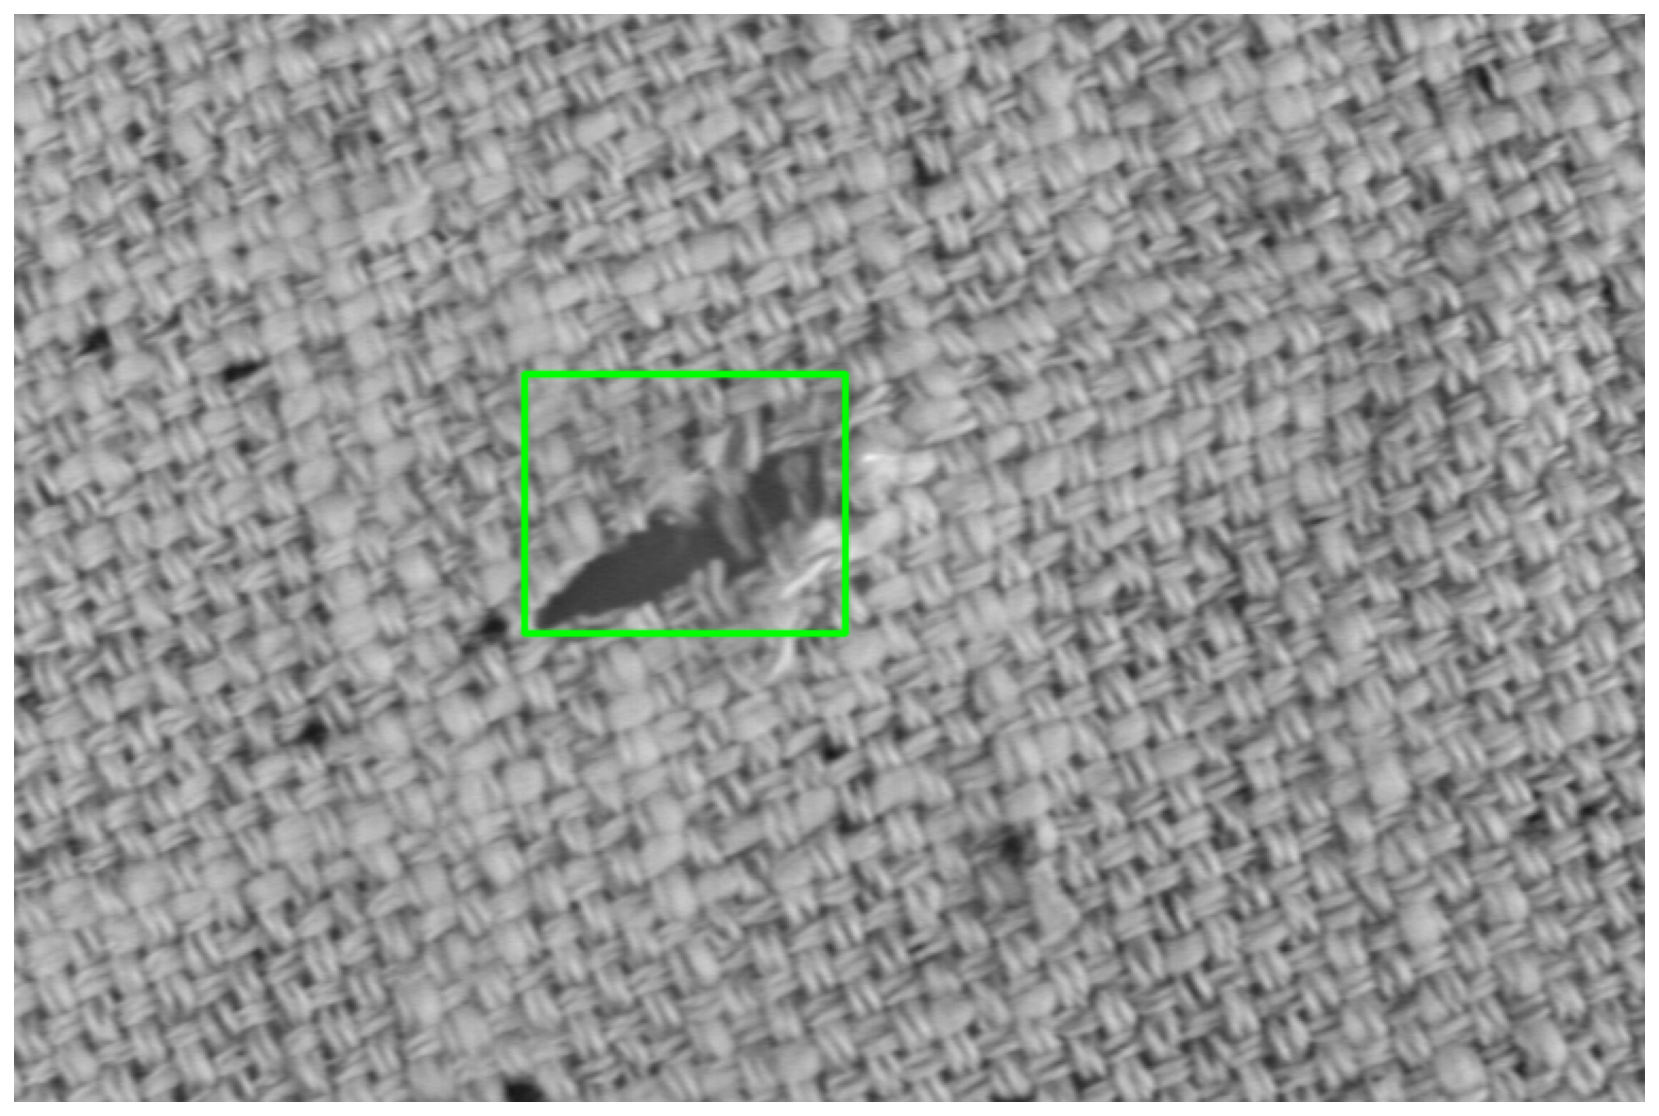

In [20]:
show_image_objects(df.iloc[0])

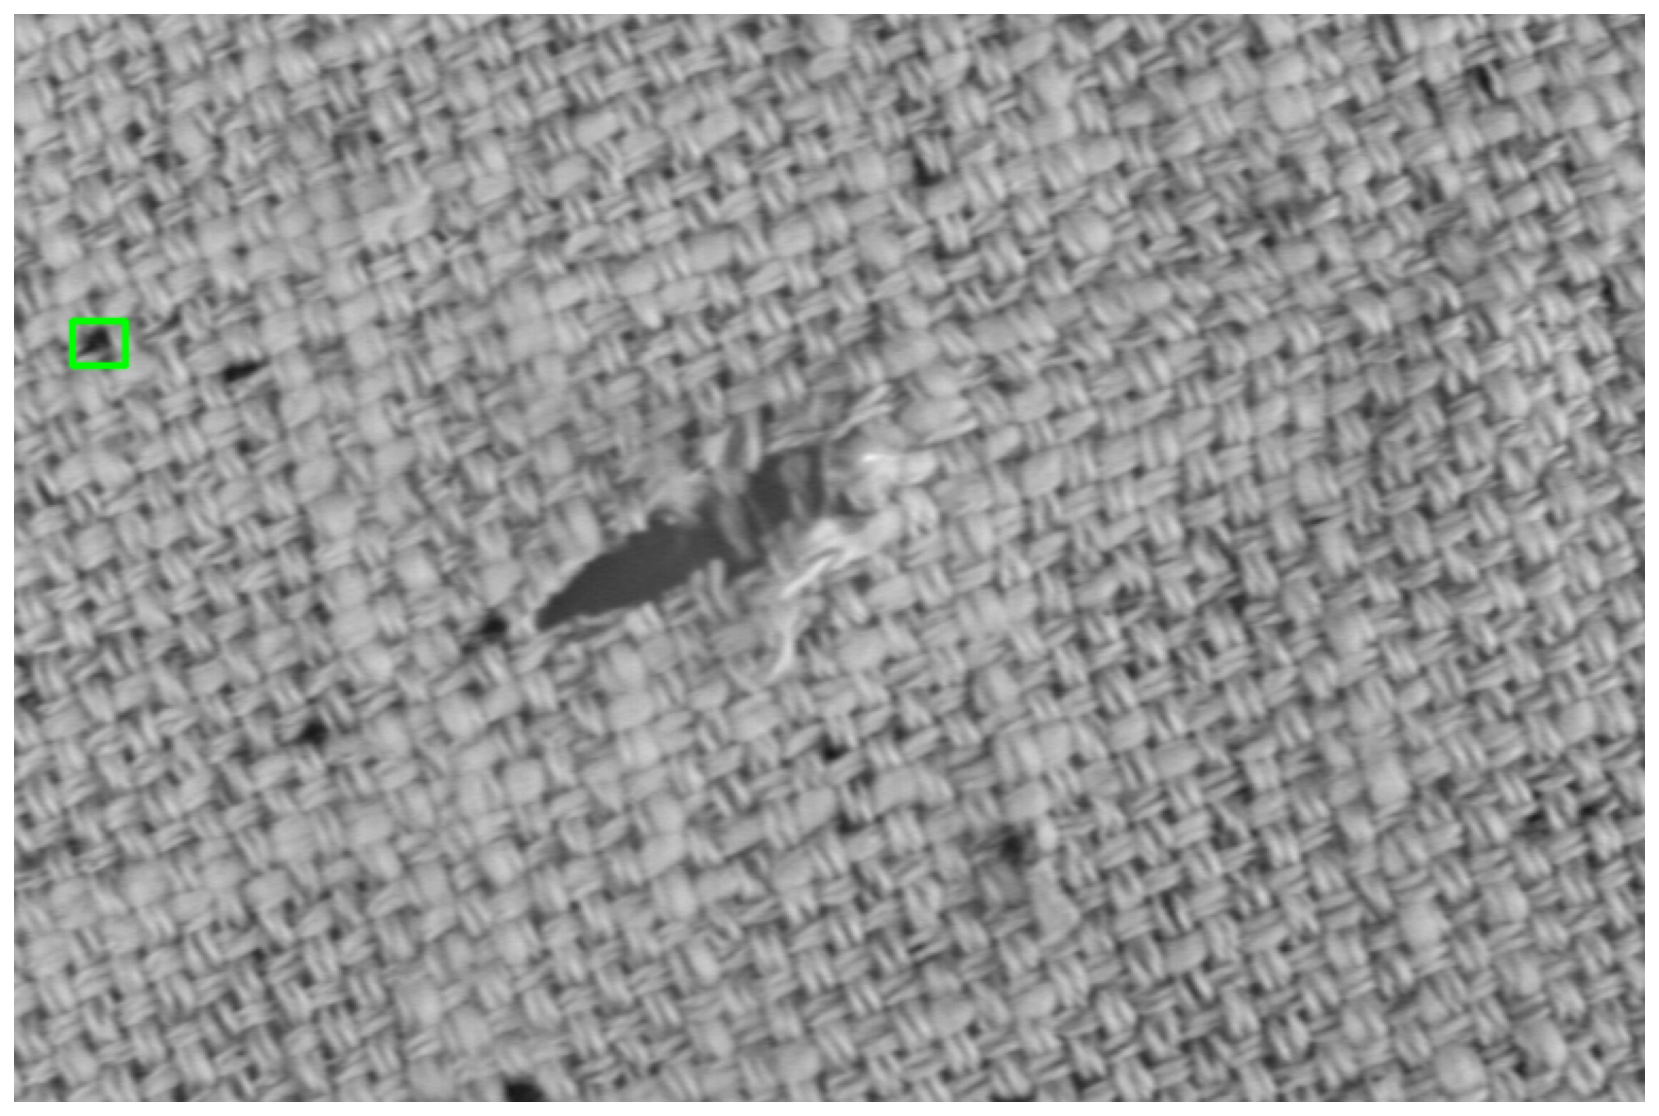

In [21]:
show_image_objects(df.iloc[1])

# Preprocessing

In [22]:
train_df, test_df = train_test_split(
  df, 
  test_size=0.2, 
  random_state=RANDOM_SEED
)

In [36]:
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'
ANNOTATIONS_FILE_TEST = 'annotations_test.csv'


In [24]:
train_df

image_name  x_min  y_min  x_max  y_max  \
946    maskdb/train/images/c2r2e2n8_273.tif     17      1    289     79   
394   maskdb/train/images/c2r3e2n13_288.tif    382    416    424    456   
1023  maskdb/train/images/c2r3e1n46_072.tif     35     15    307    270   
816   maskdb/train/images/c2r3e1n39_032.tif    744    339    757    370   
88    maskdb/train/images/c1r1e2n25_374.tif      1    389     29    418   
...                                     ...    ...    ...    ...    ...   
1044  maskdb/train/images/c1r1e2n50_349.tif      1    384     32    412   
1095   maskdb/train/images/c1r3e2n3_248.tif      1    386     21    409   
1130   maskdb/train/images/c2r3e1n4_187.tif    171    477    208    496   
860    maskdb/train/images/c2r3e2n8_231.tif      1    456     54    503   
1126   maskdb/train/images/c2r3e1n6_199.tif    299    125    317    139   

     class_name  
946       Stain  
394        Hole  
1023       Line  
816        Hole  
88        Stain  
...         ...  
1044      Stain  
1095      Stain  
1130       Hole  
860        Hole  
1126       Hole  

[988 rows x 6 columns]

In [38]:
train_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)
test_df.to_csv(ANNOTATIONS_FILE_TEST, index=False, header=None)

In [26]:
!head classes.csv

Stain,0
Hole,1
Line,2


In [27]:
!head annotations.csv

maskdb/train/images/c2r2e2n8_273.tif,17,1,289,79,Stain
maskdb/train/images/c2r3e2n13_288.tif,382,416,424,456,Hole
maskdb/train/images/c2r3e1n46_072.tif,35,15,307,270,Line
maskdb/train/images/c2r3e1n39_032.tif,744,339,757,370,Hole
maskdb/train/images/c1r1e2n25_374.tif,1,389,29,418,Stain
maskdb/train/images/c2r3e1n24_026.tif,624,405,645,439,Hole
maskdb/train/images/c2r3e1n41_161.tif,637,460,660,490,Hole
maskdb/train/images/c2r3e2n43_328.tif,396,45,432,81,Hole
maskdb/train/images/c2r3e2n35_294.tif,738,113,763,161,Hole
maskdb/train/images/c1r3e1n41_221.tif,415,410,516,512,Hole


In [41]:
!head annotations_test.csv

maskdb/train/images/c2r3e2n11_367.tif,1,283,49,301,Hole
maskdb/train/images/c1r1e2n44_262.tif,672,82,725,160,Stain
maskdb/train/images/c2r3e1n43_059.tif,124,114,138,136,Hole
maskdb/train/images/c2r3e1n3_203.tif,112,152,128,174,Hole
maskdb/train/images/c2r3e2n34_252.tif,449,220,479,251,Hole
maskdb/train/images/c2r3e1n1_162.tif,98,167,125,186,Hole
maskdb/train/images/c2r3e1n38_173.tif,221,210,405,280,Hole
maskdb/train/images/c1r3e1n43_085.tif,268,448,379,512,Hole
maskdb/train/images/c2r3e2n50_237.tif,199,35,251,71,Hole
maskdb/train/images/c2r3e1n40_225.tif,513,325,556,371,Hole


# Training

In [28]:
if 1:
    PRETRAINED_MODEL = './snapshots/resnet50_csv_.h5'
    if not os.path.isfile(PRETRAINED_MODEL):
        URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
        urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)
        print('Downloaded pretrained model to ' + PRETRAINED_MODEL)
        

In [29]:
!pip3 install progressbar2

## Training

In [42]:
if 1:#make this zero if you dont want to train
    !keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 4 --steps 10 --epochs 1 csv annotations.csv classes.csv  

2021-05-29 20:07:57.309372: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Creating model, this may take a second...
2021-05-29 20:07:58.964288: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-29 20:07:58.965140: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-29 20:07:58.991403: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-29 20:07:58.992179: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.771GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s
2021-05-29 20:07:58.992203: I ten

2021-05-29 20:08:02.765154: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-05-29 20:08:02.785082: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2799925000 Hz
2021-05-29 20:08:08.584388: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2021-05-29 20:08:09.539332: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-05-29 20:08:09.766550: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED
2021-05-29 20:08:09.803911: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED
2021-05-29 20:08:09.815999: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED
2021-05-29 20:08:09.86756

2021-05-29 20:08:11.880286: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED
2021-05-29 20:08:11.903114: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED
2021-05-29 20:08:11.938376: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED
2021-05-29 20:08:11.950556: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED
2021-05-29 20:08:11.956668: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED
2021-05-29 20:08:11.968139: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED
2021-05-29 20:08:11.983388: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_ALLOC_FAILED
2021-05-29 20:08:12.035850:

2021-05-29 20:08:12.570755: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 8B (8 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-05-29 20:08:12.570806: E tensorflow/stream_executor/stream.cc:5011] Internal: Failed to enqueue async memset operation: CUDA_ERROR_INVALID_VALUE: invalid argument
2021-05-29 20:08:12.570897: E tensorflow/stream_executor/cuda/cuda_driver.cc:1051] failed to enqueue async memcpy from device to host: CUDA_ERROR_INVALID_VALUE: invalid argument; host dst: 0x7fb584ffaeb0; GPU src: (nil); size: 8=0x8
2021-05-29 20:08:12.570912: I tensorflow/stream_executor/stream.cc:4977] [stream=0x5970af0,impl=0x5831c10] Internal: stream did not block host until done; was already in an error state
2021-05-29 20:08:12.571645: I tensorflow/stream_executor/cuda/cuda_driver.cc:789] failed to allocate 8B (8 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory
2021-05-29 20:08:12.571663: E tensorflow/stream_executor/stream.cc:5011] Interna

## Performance evaluation 
At end of training, you can see average precision of each class and Mean Average Precision (mAP)

In [43]:
if 1:#make this one and run to train again
    !keras_retinanet/bin/train.py --freeze-backbone  --random-transform --weights {PRETRAINED_MODEL} --batch-size 4 --steps 10 --epochs 1 --compute-val-loss csv annotations.csv classes.csv --val-annotations annotations_test.csv   

2021-05-29 20:08:44.629866: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Creating model, this may take a second...
2021-05-29 20:08:46.324452: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-29 20:08:46.325284: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-29 20:08:46.352093: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-29 20:08:46.352522: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.771GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s
2021-05-29 20:08:46.352570: I ten

Total params: 36,424,447
Trainable params: 12,863,295
Non-trainable params: 23,561,152
__________________________________________________________________________________________________
None
/home/skycam/venv3.6/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-05-29 20:08:50.208811: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-05-29 20:08:50.229130: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2799925000 Hz
2021-05-29 20:08:55.152722: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2021-05-29 20:08:56.137908: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Succe

# Loading the trained model

In [31]:
!ls snapshots

_pretrained_model.h5  resnet50_csv_.h5


In [40]:
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

labels_to_names = pd.read_csv(CLASSES_FILE, header=None).T.loc[0].to_dict()

snapshots/resnet50_csv_.h5


# Predictions

In [41]:
def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels

In [42]:
THRES_SCORE = 0.2

def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score > THRES_SCORE:
        #break

        color = label_color(label)
        #print('label',label)
        b = box.astype(int)
        draw_box(image, b, color=color)

        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(image, b, caption)

In [50]:
def show_detected_objects(image_row):
    img_path = image_row.image_name

    image = read_image_bgr(img_path)

    boxes, scores, labels = predict(image)
    #import pdb;pdb.set_trace()

    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    true_box = [
    image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
    ]
    draw_box(draw, true_box, color=(0, 255, 0))

    draw_detections(draw, boxes, scores, labels)

    plt.axis('off')
    plt.imshow(draw)
    plt.show()
show_detected_objects(test_df.iloc[4])

In [44]:
test_df.head(n=10)

image_name  x_min  y_min  x_max  y_max  \
292   maskdb/train/images/c2r3e2n11_367.tif      1    283     49    301   
630   maskdb/train/images/c1r1e2n44_262.tif    672     82    725    160   
1200  maskdb/train/images/c2r3e1n43_059.tif    124    114    138    136   
113    maskdb/train/images/c2r3e1n3_203.tif    112    152    128    174   
174   maskdb/train/images/c2r3e2n34_252.tif    449    220    479    251   
422    maskdb/train/images/c2r3e1n1_162.tif     98    167    125    186   
760   maskdb/train/images/c2r3e1n38_173.tif    221    210    405    280   
506   maskdb/train/images/c1r3e1n43_085.tif    268    448    379    512   
1077  maskdb/train/images/c2r3e2n50_237.tif    199     35    251     71   
1055  maskdb/train/images/c2r3e1n40_225.tif    513    325    556    371   

     class_name  
292        Hole  
630       Stain  
1200       Hole  
113        Hole  
174        Hole  
422        Hole  
760        Hole  
506        Hole  
1077       Hole  
1055       Hole

In [45]:
show_detected_objects(test_df.iloc[0])

In [46]:
#show_detected_objects(test_df.iloc[1])

In [47]:
#show_detected_objects(test_df.iloc[2])